# PROJECT

# LOAN APPROVAL AND RISKY SCORE REGRESSION

# GROUP L

# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input



# Read and Load Dataset

In [2]:
df = pd.read_csv('Loan.csv')


In [3]:
df.tail()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0
19999,2072-10-03,20,53227,574,Employed,Associate,0,32055,48,Married,...,4435.583333,0.853801,5,41372,0.240055,0.242693,1049.830407,0.298006,0,59.0


In [4]:
df.shape

(20000, 36)

# Name of Columns

In [5]:
df.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

# Find Null Values

In [7]:
df.isna()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isna().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [9]:
df.isna().sum().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

# Replace Categorical Columns ti numerical

In [11]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  


# First Half Group

In [12]:
G1 = df.iloc[ : , :18]
G1.shape


(20000, 18)

# Second Half Group

In [13]:
G2 = df.iloc[ : ,18:37]
G2.shape


(20000, 18)

# Corelation of First Half Group

In [14]:
correlation=G1.corr()
correlation


,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory
ApplicationDate,1.000000,0.007367,-0.010590,-0.004712,-0.004990,0.005136,0.006645,-0.002649,0.001345,-0.011341,-0.009212,0.001896,0.004559,0.018195,-0.002219,-0.011092,-0.008219,0.007774
Age,0.007367,1.000000,0.144774,0.323243,0.003228,-0.003267,0.982980,-0.007492,-0.006992,-0.005489,-0.000287,-0.001731,0.015685,-0.001394,-0.001069,-0.002165,0.004438,0.010817
AnnualIncome,-0.010590,0.144774,1.000000,0.104045,0.013519,0.004814,0.145999,-0.004116,0.002972,-0.005613,-0.001244,0.011141,-0.001082,-0.007935,-0.008175,-0.005016,0.001507,0.003816
CreditScore,-0.004712,0.323243,0.104045,1.000000,0.018160,0.008083,0.327664,-0.010834,-0.000762,-0.000507,-0.014453,0.006607,0.011153,-0.009650,-0.008780,-0.001928,0.001913,0.008638
EmploymentStatus,-0.004990,0.003228,0.013519,0.018160,1.000000,0.005608,0.002799,0.009805,-0.000839,-0.004365,-0.003102,0.003668,0.001796,0.017346,0.013063,0.002139,0.003828,-0.000888
EducationLevel,0.005136,-0.003267,0.004814,0.008083,0.005608,1.000000,-0.004073,0.001342,-0.003007,0.003663,-0.007222,0.001842,-0.000136,0.006933,0.007108,0.005411,0.004030,0.001866
Experience,0.006645,0.982980,0.145999,0.327664,0.002799,-0.004073,1.000000,-0.007921,-0.007924,-0.004426,0.000136,-0.001631,0.018629,-0.001751,-0.002143,-0.002905,0.003139,0.009600
LoanAmount,-0.002649,-0.007492,-0.004116,-0.010834,0.009805,0.001342,-0.007921,1.000000,-0.000436,-0.000165,-0.007005,0.007807,0.021103,0.000806,0.000769,-0.006239,-0.009577,0.004844
LoanDuration,0.001345,-0.006992,0.002972,-0.000762,-0.000839,-0.003007,-0.007924,-0.000436,1.000000,0.003906,-0.001301,-0.011408,0.000068,-0.006160,0.001489,0.000978,0.001913,-0.000434
MaritalStatus,-0.011341,-0.005489,-0.005613,-0.000507,-0.004365,0.003663,-0.004426,-0.000165,0.003906,1.000000,0.000954,0.008265,0.009805,0.003838,0.013901,0.011994,0.013599,0.017035


# Heatmap First Half

<Axes: >

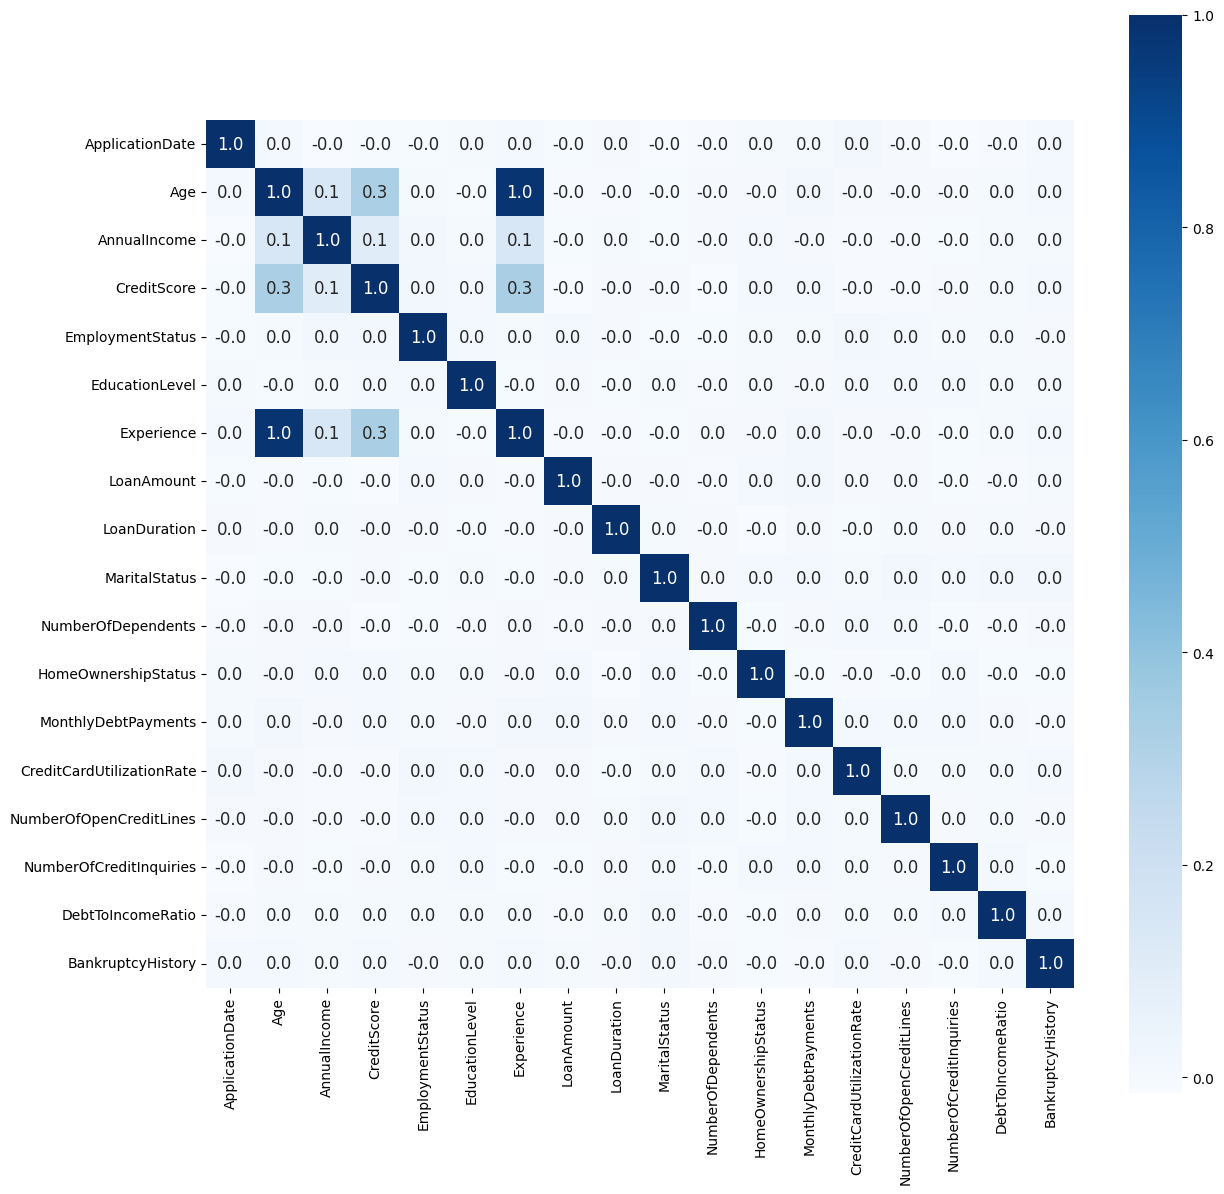

In [15]:
correlation=G1.corr()
correlation

plt.figure(figsize=(14,14))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', 
annot=True, annot_kws={'size':12}, cmap='Blues')


In [16]:
df.shape

(20000, 36)

# Corelation of Second Half

In [17]:
correlation=G2.corr()
correlation


,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
LoanPurpose,1.000000,-0.001272,0.011489,-0.003223,0.004335,0.002350,0.000172,-0.004297,-0.006935,-0.008587,0.000465,0.002334,0.003249,0.000820,0.004452,0.001540,-0.007062,0.005521
PreviousLoanDefaults,-0.001272,1.000000,0.002079,0.005503,0.002616,0.006008,0.006939,-0.003732,0.004639,-0.011716,0.003628,0.008605,0.013689,0.008299,-0.011763,-0.000458,-0.065343,0.258659
PaymentHistory,0.011489,0.002079,1.000000,0.001090,-0.004736,-0.017384,-0.007135,-0.011324,0.003335,0.010530,-0.007882,-0.002853,-0.002999,0.002030,-0.000883,0.003420,0.030804,-0.016992
LengthOfCreditHistory,-0.003223,0.005503,0.001090,1.000000,-0.011103,-0.002911,0.004588,0.000318,-0.005526,0.006534,0.015104,0.004313,0.004399,0.004991,-0.010042,-0.009381,0.105949,-0.177796
SavingsAccountBalance,0.004335,0.002616,-0.004736,-0.011103,1.000000,-0.000392,0.006705,-0.002128,-0.001572,-0.008145,-0.004250,0.003458,0.006012,0.002731,0.000212,-0.003484,0.000961,0.002190
CheckingAccountBalance,0.002350,0.006008,-0.017384,-0.002911,-0.000392,1.000000,0.003322,0.001473,0.009233,-0.005696,-0.002440,0.001596,-0.003554,-0.001943,0.002281,-0.006630,0.000660,-0.004044
TotalAssets,0.000172,0.006939,-0.007135,0.004588,0.006705,0.003322,1.000000,-0.000276,-0.004128,-0.000479,0.007057,0.978997,-0.007368,-0.005807,-0.000875,-0.007333,0.184011,-0.297117
TotalLiabilities,-0.004297,-0.003732,-0.011324,0.000318,-0.002128,0.001473,-0.000276,1.000000,-0.001761,-0.006187,-0.003399,-0.129962,0.007140,0.010176,-0.001668,-0.002427,-0.029434,0.055617
MonthlyIncome,-0.006935,0.004639,0.003335,-0.005526,-0.001572,0.009233,-0.004128,-0.001761,1.000000,-0.010641,-0.001422,-0.003284,-0.075522,-0.064565,-0.005905,-0.538314,0.604101,-0.487039
UtilityBillsPaymentHistory,-0.008587,-0.011716,0.010530,0.006534,-0.008145,-0.005696,-0.000479,-0.006187,-0.010641,1.000000,-0.007986,-0.000968,-0.005517,-0.004051,-0.007481,0.006942,0.003303,-0.005196


# Heatmap of Second Halp

<Axes: >

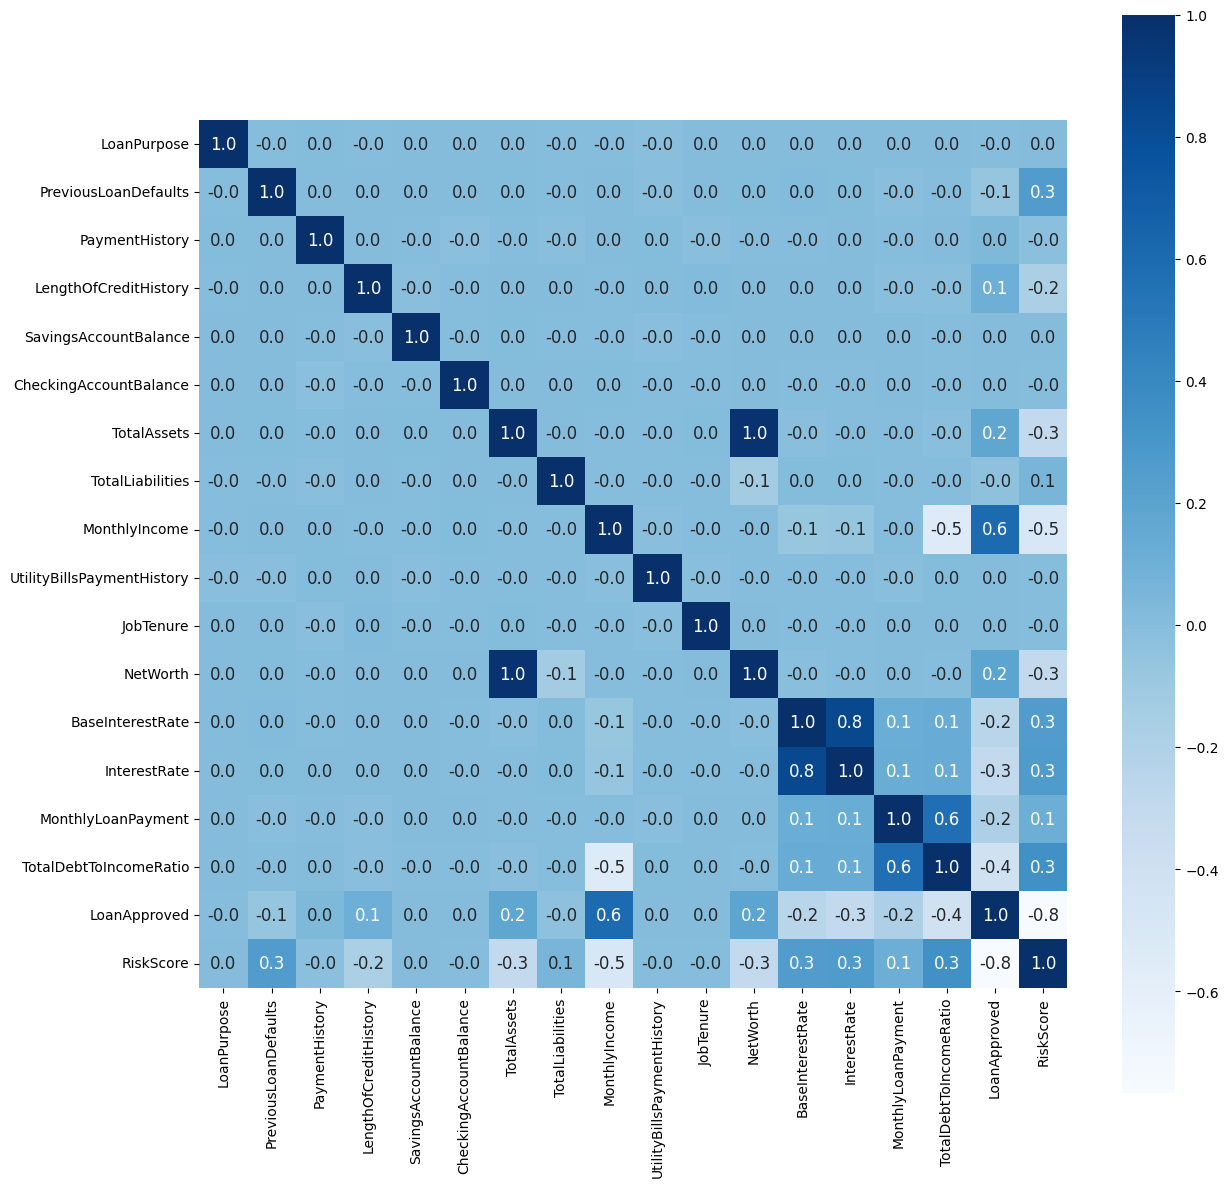

In [18]:
correlation=G2.corr()
correlation
plt.figure(figsize=(14,14))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', 
annot=True, annot_kws={'size':12}, cmap='Blues')


In [19]:
df.shape

(20000, 36)

# Combine Group one and Two

In [20]:
df=pd.concat([G1,G2], axis=1,ignore_index=False )

In [21]:
df.shape

(20000, 36)

# Then apply Corelation

In [22]:
correlation = df.corr()
correlation

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
ApplicationDate,1.000000,0.007367,-0.010590,-0.004712,-0.004990,0.005136,0.006645,-0.002649,0.001345,-0.011341,...,-0.010630,0.006943,-0.007983,-0.001883,0.003161,0.001148,-0.005480,-0.001799,-0.005704,0.007974
Age,0.007367,1.000000,0.144774,0.323243,0.003228,-0.003267,0.982980,-0.007492,-0.006992,-0.005489,...,0.144634,-0.005601,-0.000773,0.014061,-0.238995,-0.202702,-0.021380,-0.111800,0.141029,-0.164304
AnnualIncome,-0.010590,0.144774,1.000000,0.104045,0.013519,0.004814,0.145999,-0.004116,0.002972,-0.005613,...,0.989911,-0.012351,-0.000610,-0.004358,-0.074549,-0.063832,-0.004304,-0.532033,0.597900,-0.483289
CreditScore,-0.004712,0.323243,0.104045,1.000000,0.018160,0.008083,0.327664,-0.010834,-0.000762,-0.000507,...,0.104796,-0.006838,0.008069,0.001951,-0.722619,-0.598844,-0.063932,-0.115363,0.142000,-0.240198
EmploymentStatus,-0.004990,0.003228,0.013519,0.018160,1.000000,0.005608,0.002799,0.009805,-0.000839,-0.004365,...,0.014262,0.000793,0.004600,-0.013421,-0.009818,-0.008926,0.006687,-0.009122,-0.020411,0.132964
EducationLevel,0.005136,-0.003267,0.004814,0.008083,0.005608,1.000000,-0.004073,0.001342,-0.003007,0.003663,...,0.003943,0.002437,0.004036,0.011414,-0.007037,-0.002536,0.001473,0.002635,0.019650,-0.017034
Experience,0.006645,0.982980,0.145999,0.327664,0.002799,-0.004073,1.000000,-0.007921,-0.007924,-0.004426,...,0.145950,-0.006603,-0.000762,0.015049,-0.242871,-0.206252,-0.021691,-0.112825,0.140755,-0.166496
LoanAmount,-0.002649,-0.007492,-0.004116,-0.010834,0.009805,0.001342,-0.007921,1.000000,-0.000436,-0.000165,...,-0.005407,-0.012107,0.005364,-0.003679,0.385663,0.322824,0.780828,0.457175,-0.239496,0.137981
LoanDuration,0.001345,-0.006992,0.002972,-0.000762,-0.000839,-0.003007,-0.007924,-0.000436,1.000000,0.003906,...,0.003067,-0.010105,0.003635,-0.008779,0.579215,0.487994,-0.385495,-0.213984,-0.094558,0.054550
MaritalStatus,-0.011341,-0.005489,-0.005613,-0.000507,-0.004365,0.003663,-0.004426,-0.000165,0.003906,1.000000,...,-0.006169,0.000731,0.006668,-0.001683,0.002563,0.003604,0.002944,0.009498,-0.006828,0.016824


# Heatmap 

<Axes: >

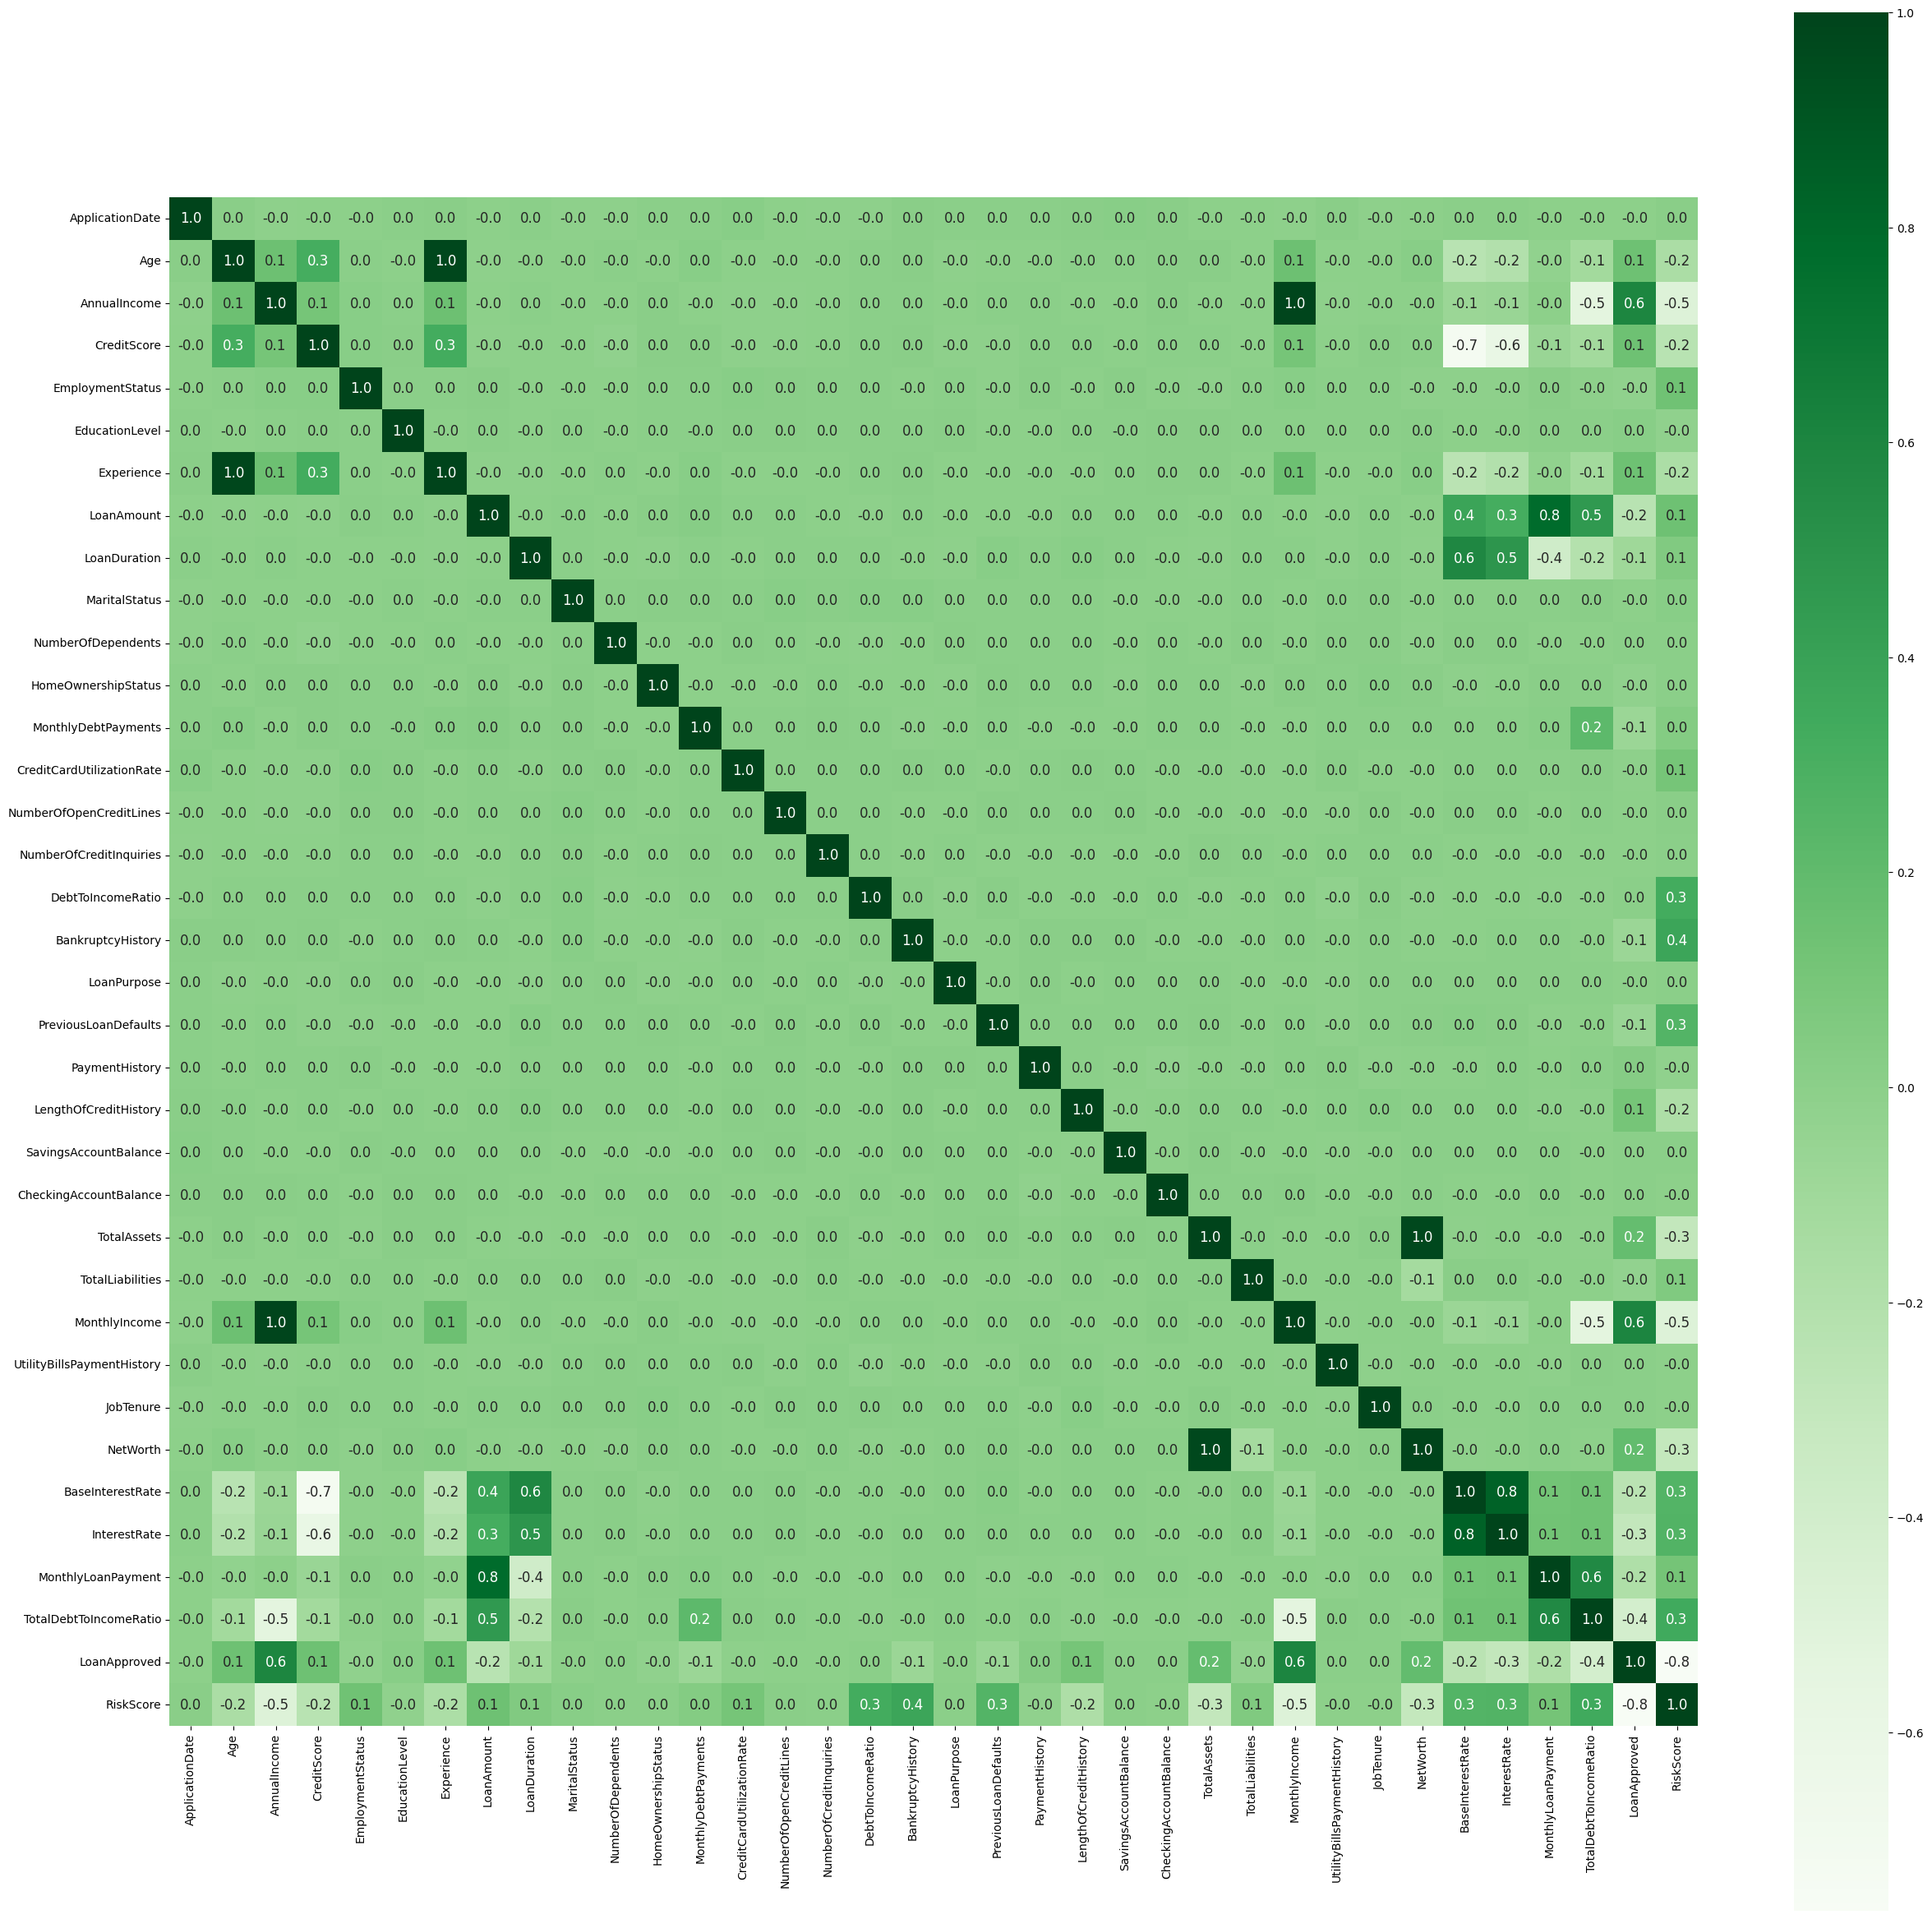

In [23]:
plt.figure(figsize=(30,30))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', 
annot=True, annot_kws={'size':12}, cmap='Greens')

# Separate Class And Features

In [24]:
X = df.drop('LoanApproved', axis=1)  
Y = df['LoanApproved']

In [25]:
print(X)

       ApplicationDate  Age  AnnualIncome  CreditScore  EmploymentStatus  \
0                    0   45         39948          617                 0   
1                    1   38         39709          628                 0   
2                    2   47         40724          570                 0   
3                    3   58         69084          545                 0   
4                    4   37        103264          594                 0   
...                ...  ...           ...          ...               ...   
19995            19995   44         30180          587                 0   
19996            19996   56         49246          567                 0   
19997            19997   44         48958          645                 0   
19998            19998   60         41025          560                 0   
19999            19999   20         53227          574                 0   

       EducationLevel  Experience  LoanAmount  LoanDuration  MaritalStatus  \
0        

In [26]:
print(Y)

0        0
1        0
2        0
3        0
4        1
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: LoanApproved, Length: 20000, dtype: int64


## Standardized Features

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.73196421,  0.45148937, -0.47617228, ..., -0.72906227,
        -0.65238754, -0.22714896],
       [-1.731791  , -0.15079473, -0.48209548, ..., -0.1742642 ,
        -0.03637838,  0.15855094],
       [-1.7316178 ,  0.62357054, -0.45694048, ..., -0.36349318,
         0.17696226,  0.15855094],
       ...,
       [ 1.7316178 ,  0.36544878, -0.25287521, ...,  0.05013649,
        -0.13264194, -0.74141549],
       [ 1.731791  ,  1.74209816, -0.44948072, ..., -0.74186709,
         0.01916834,  1.05851737],
       [ 1.73196421, -1.69952528, -0.14707553, ...,  0.2049069 ,
        -0.30737917,  1.05851737]])

# Apply PCA

In [28]:
pca = PCA(n_components=25)  
X_pca = pca.fit_transform(X_scaled)

In [29]:
df.shape

(20000, 36)

# Split dataset 20%80%

# Split Dataset

In [30]:

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=80)

In [31]:
from sklearn.model_selection import train_test_split
X_TRAIN , X_TEST , Y_TRAIN, Y_TEST = train_test_split(X,Y, test_size =
0.2, random_state=80)

In [32]:
from sklearn.model_selection import train_test_split
X_TRAIN , X_TEST , Y_TRAIN, Y_TEST = train_test_split(X_pca,Y, test_size =0.2, random_state=80)

In [33]:
print("Size of Train X = " , len(X_TRAIN))
print("Size of Train Y = " , len(Y_TRAIN))
print("Size of Test X = " , len(X_TEST))
print("Size of Test Y = " , len(Y_TEST))

Size of Train X =  16000
Size of Train Y =  16000
Size of Test X =  4000
Size of Test Y =  4000


# Neural Network Model

In [34]:

ma = Sequential([
    Input(shape=(X_TRAIN.shape[1],)),  # Define input shape explicitly
    Dense(64, activation='relu'),  # First hidden layer with 64 neurons
    Dropout(0.2),  # Dropout for regularization
    Dense(32, activation='relu'),  # Second hidden layer with 32 neurons
    Dropout(0.2),  # Dropout for regularization
    Dense(16, activation='relu'),  # Third hidden layer with 16 neurons
    Dense(1, activation='sigmoid')  # Output layer for regression
])

In [35]:
X_TRAIN.shape[1]

25

## Compile the model

In [36]:
ma.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Train the model

In [37]:
history = ma.fit(X_TRAIN, Y_TRAIN, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7593 - loss: 0.4616 - val_accuracy: 0.9588 - val_loss: 0.1051
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9467 - loss: 0.1350 - val_accuracy: 0.9619 - val_loss: 0.0989
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9517 - loss: 0.1165 - val_accuracy: 0.9628 - val_loss: 0.0939
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9563 - loss: 0.1074 - val_accuracy: 0.9647 - val_loss: 0.0866
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9615 - loss: 0.0969 - val_accuracy: 0.9684 - val_loss: 0.0820
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9630 - loss: 0.0872 - val_accuracy: 0.9703 - val_loss: 0.0757
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9682 - loss: 0.0774 - val_accuracy: 0.9744 - val_loss: 0.0679
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9727 - loss: 0.0673 - val_accuracy: 0.

## Model summary

In [38]:
ma.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,869 (50.27 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,580 (33.52 KB)

## Evaluate the model

In [39]:
loss, mae = ma.evaluate(X_TEST, Y_TEST, verbose=1)
print(f"Mean Absolute Error on Test Data: {mae}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9955 - loss: 0.0175
Mean Absolute Error on Test Data: 0.9962499737739563


## Predictions

In [40]:
X_test_pca = pca.transform(X_test)

In [41]:
y_pred = ma.predict(X_test_pca)  # Use the PCA-transformed test data
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


## Confusion matrix

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(Y_TEST, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[3067    6]
 [   9  918]]


### Visualization

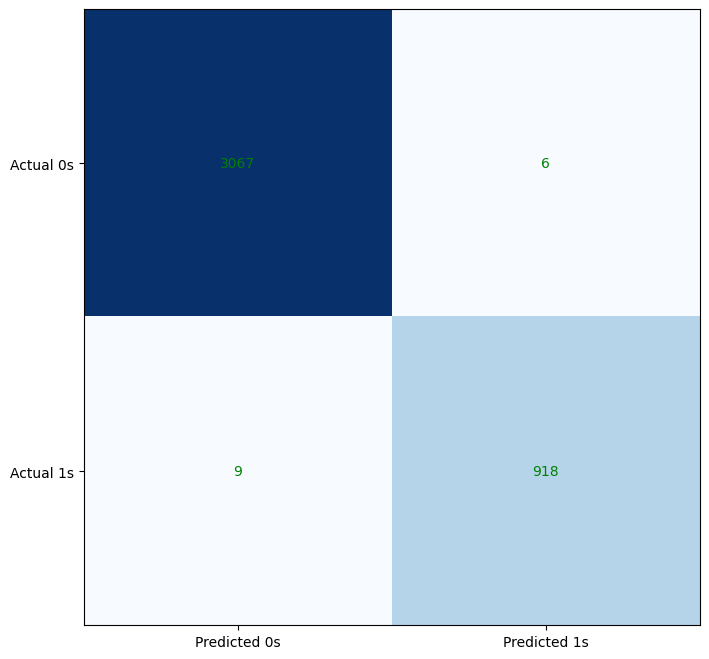

In [43]:
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(Y_TEST, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')
ax.xaxis.set(ticks=range(2), ticklabels=['Predicted 0s', 'Predicted 1s'])
ax.yaxis.set(ticks=range(2), ticklabels=['Actual 0s', 'Actual 1s'])
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='green')
plt.show()

## Classification report

In [44]:
from sklearn.metrics import classification_report
#Y_Test (actual labels) and y_pred (predicted labels)
report = classification_report(Y_TEST, y_pred,zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3073
           1       0.99      0.99      0.99       927

    accuracy                           1.00      4000
   macro avg       1.00      0.99      0.99      4000
weighted avg       1.00      1.00      1.00      4000



## Plot Training History

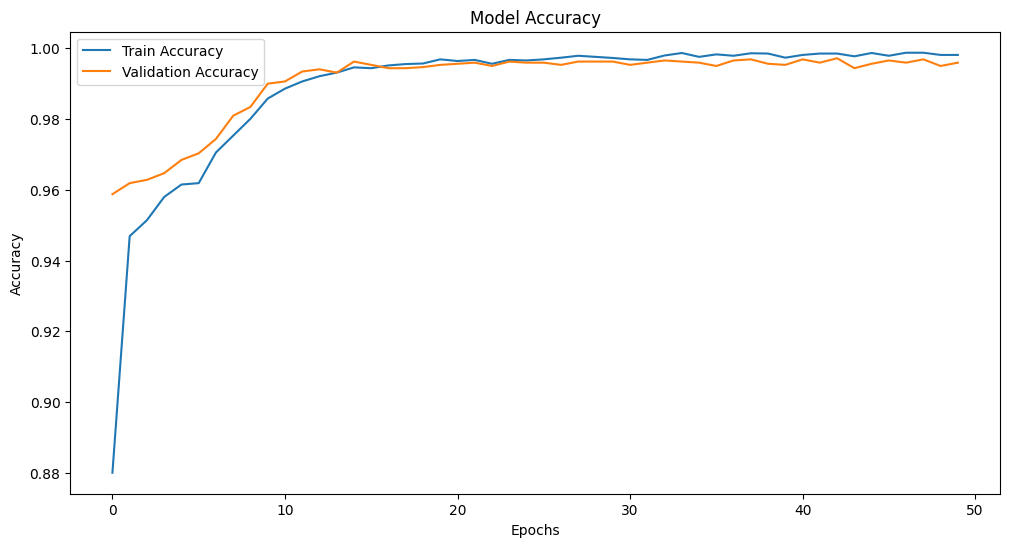

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



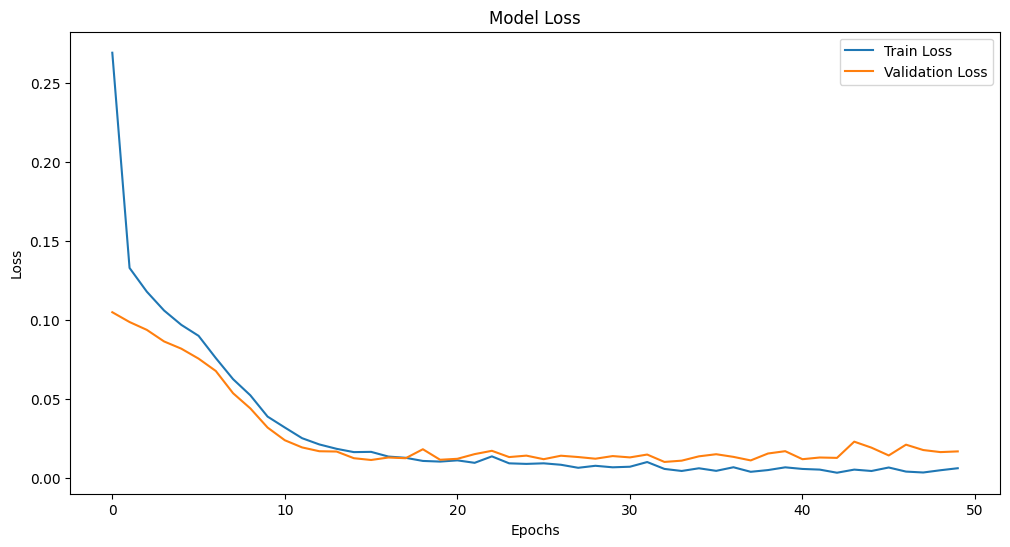

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Logestic Regression

## Training on Train Set

In [47]:
from sklearn.linear_model import LogisticRegression
df = LogisticRegression(solver='liblinear', random_state=80)
df.fit(X_TRAIN, Y_TRAIN)
LogisticRegression(random_state=80, solver='liblinear')



LogisticRegression(random_state=80, solver='liblinear')

In [48]:
y_pred = df.predict(X_TRAIN)
print(y_pred)

[0 0 0 ... 0 0 0]


In [49]:
print(Y_TRAIN)

4646     0
12970    0
18846    0
2327     0
5120     0
        ..
8714     0
2259     0
19366    0
5308     0
17583    0
Name: LoanApproved, Length: 16000, dtype: int64


## Training Accuracy 

In [50]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_TRAIN,y_pred)
print('the accuracy of prediction is',accuracy)

the accuracy of prediction is 0.9636875


## Draw Confusion Matrix

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
#Y_Train (actual labels) and y_pred (predicted labels)
confusion_matrix(Y_TRAIN,y_pred)

array([[11876,   271],
       [  310,  3543]], dtype=int64)

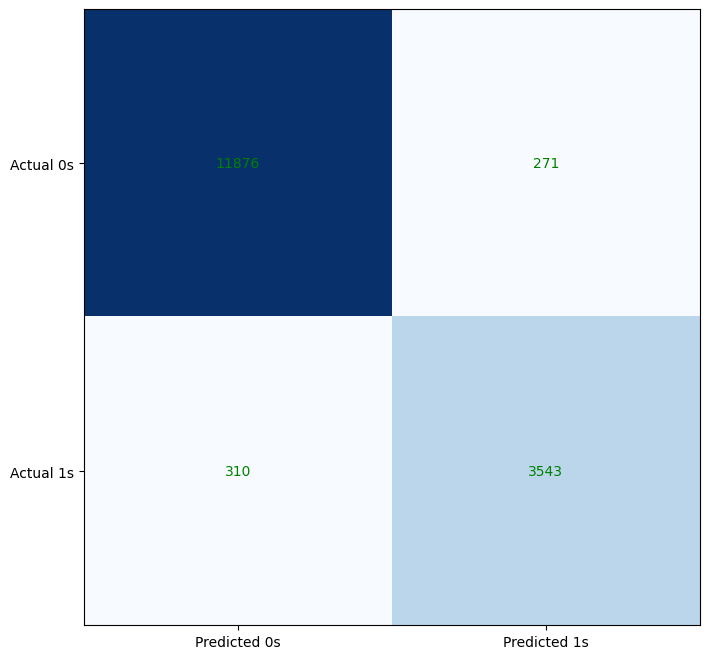

In [52]:
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(Y_TRAIN, y_pred)

# Create figure and axis for the plot with specific size
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')  # Use a colormap for better visuals

# Set ticks and labels for x-axis (predicted values)
ax.xaxis.set(ticks=range(2), ticklabels=('Predicted 0s', 'Predicted 1s'))

# Set ticks and labels for y-axis (actual values)
ax.yaxis.set(ticks=range(2), ticklabels=('Actual 0s', 'Actual 1s'))

# Set limits to match the matrix structure
ax.set_ylim(1.5, -0.5)

# Add values to each cell in the confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='green')

# Display the plot
plt.show()


## Testing On Test Set

In [53]:
y_pred = df.predict(X_TEST)
print(y_pred)


[0 0 1 ... 0 0 0]


In [54]:
print(Y_TEST)

5228     0
12332    0
4692     1
2617     0
5633     0
        ..
17709    1
18039    0
17535    0
11445    0
19706    0
Name: LoanApproved, Length: 4000, dtype: int64


## Testing Accuracy

In [55]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TEST, y_pred)
print("The Accuracy of Prediction on S is ", accuracy)


The Accuracy of Prediction on S is  0.96075


## Draw Confusion Matrix

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_TEST, y_pred)

array([[3005,   68],
       [  89,  838]], dtype=int64)

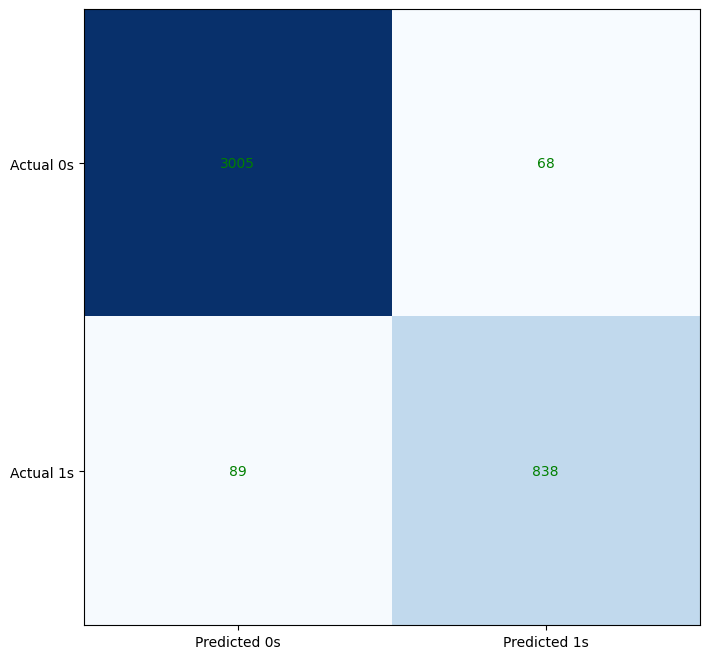

In [57]:
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(Y_TEST, y_pred)

# Create figure and axis for the plot with specific size
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')  # Use a colormap for better visuals

# Set ticks and labels for x-axis (predicted values)
ax.xaxis.set(ticks=range(2), ticklabels=('Predicted 0s', 'Predicted 1s'))

# Set ticks and labels for y-axis (actual values)
ax.yaxis.set(ticks=range(2), ticklabels=('Actual 0s', 'Actual 1s'))

# Set limits to match the matrix structure
ax.set_ylim(1.5, -0.5)

# Add values to each cell in the confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='green')

# Display the plot
plt.show()

## Generate Classification Report

In [58]:
from sklearn.metrics import classification_report
#Y_Test (actual labels) and y_pred (predicted labels)
report = classification_report(Y_TEST, y_pred,zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3073
           1       0.92      0.90      0.91       927

    accuracy                           0.96      4000
   macro avg       0.95      0.94      0.94      4000
weighted avg       0.96      0.96      0.96      4000



# Gaussian Naive Base

## Training on Train Set

In [109]:
from sklearn.naive_bayes import GaussianNB
ma = GaussianNB()
ma.fit(X_TRAIN, Y_TRAIN)
GaussianNB()

GaussianNB()

In [111]:
y_pred = ma.predict(X_TRAIN)
print(y_pred)

[0 0 0 ... 0 0 0]


In [112]:
print(Y_TRAIN)

4646     0
12970    0
18846    0
2327     0
5120     0
        ..
8714     0
2259     0
19366    0
5308     0
17583    0
Name: LoanApproved, Length: 16000, dtype: int64


## Training Accuracy

In [113]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_TRAIN,y_pred)
print('the accuracy of prediction is',accuracy)

the accuracy of prediction is 0.9115


## Draw Confusion Matrix

In [114]:
from sklearn.metrics import classification_report, confusion_matrix
#Y_Train (actual labels) and y_pred (predicted labels)
confusion_matrix(Y_TRAIN,y_pred)

array([[11917,   230],
       [ 1186,  2667]], dtype=int64)

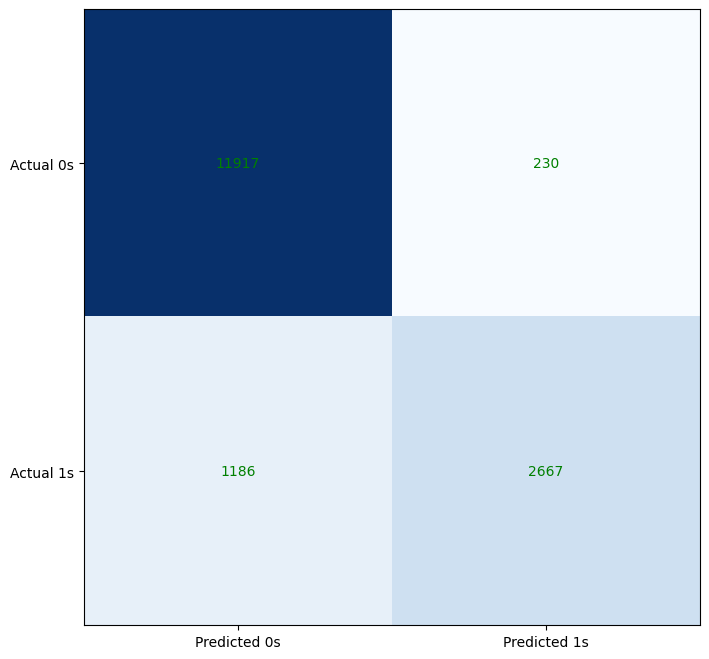

In [115]:
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(Y_TRAIN, y_pred)

# Create figure and axis for the plot with specific size
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')  # Use a colormap for better visuals

# Set ticks and labels for x-axis (predicted values)
ax.xaxis.set(ticks=range(2), ticklabels=('Predicted 0s', 'Predicted 1s'))

# Set ticks and labels for y-axis (actual values)
ax.yaxis.set(ticks=range(2), ticklabels=('Actual 0s', 'Actual 1s'))

# Set limits to match the matrix structure
ax.set_ylim(1.5, -0.5)

# Add values to each cell in the confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='green')

# Display the plot
plt.show()

## Perform Testing on Test Set

In [116]:
y_pred = df.predict(X_TEST)
print(y_pred)


[0 0 1 ... 0 0 0]


In [117]:
print(Y_TEST)

5228     0
12332    0
4692     1
2617     0
5633     0
        ..
17709    1
18039    0
17535    0
11445    0
19706    0
Name: LoanApproved, Length: 4000, dtype: int64


## Testing Accuracy

In [118]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TEST, y_pred)
print("The Accuracy of Prediction on S is ", accuracy)


The Accuracy of Prediction on S is  0.93925


## Draw Confusion Matrix

In [119]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_TEST, y_pred)

array([[2990,   83],
       [ 160,  767]], dtype=int64)

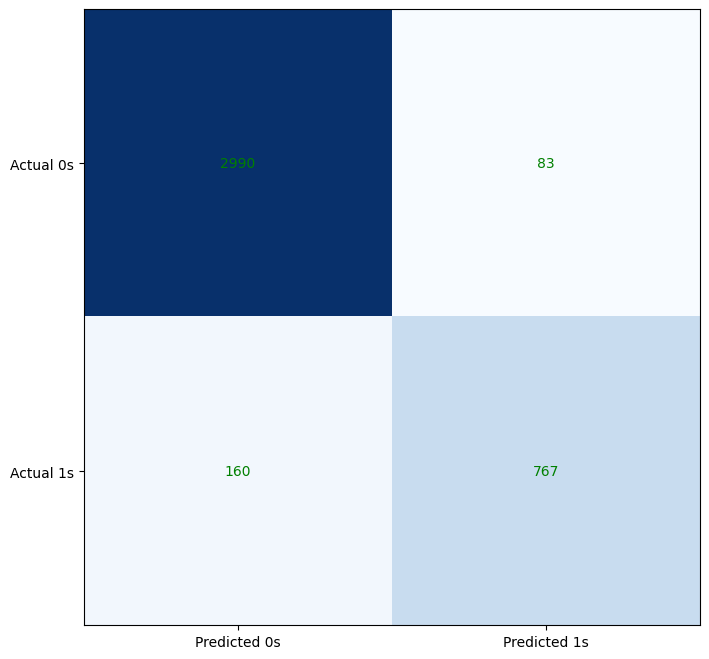

In [120]:
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(Y_TEST, y_pred)

# Create figure and axis for the plot with specific size
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')  # Use a colormap for better visuals

# Set ticks and labels for x-axis (predicted values)
ax.xaxis.set(ticks=range(2), ticklabels=('Predicted 0s', 'Predicted 1s'))

# Set ticks and labels for y-axis (actual values)
ax.yaxis.set(ticks=range(2), ticklabels=('Actual 0s', 'Actual 1s'))

# Set limits to match the matrix structure
ax.set_ylim(1.5, -0.5)

# Add values to each cell in the confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='green')

# Display the plot
plt.show()

## Generate Classification Report

In [121]:
from sklearn.metrics import classification_report
#Y_Test (actual labels) and y_pred (predicted labels)
report = classification_report(Y_TEST, y_pred,zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3073
           1       0.90      0.83      0.86       927

    accuracy                           0.94      4000
   macro avg       0.93      0.90      0.91      4000
weighted avg       0.94      0.94      0.94      4000



# Support Vector Machine

## Perform Training on Train Set

In [122]:
from sklearn import svm
df = svm.SVC(kernel='linear',random_state=80) 
df.fit(X_TRAIN, Y_TRAIN) 

SVC(kernel='linear', random_state=80)

In [123]:
y_pred = df.predict(X_TRAIN)
print(y_pred)

[0 0 0 ... 0 0 0]


In [124]:
print(Y_TRAIN)

4646     0
12970    0
18846    0
2327     0
5120     0
        ..
8714     0
2259     0
19366    0
5308     0
17583    0
Name: LoanApproved, Length: 16000, dtype: int64


## Training Accuracy

In [125]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_TRAIN,y_pred)
print('the accuracy of prediction is',accuracy)

the accuracy of prediction is 0.964375


## Draw Confusion Matrix

In [126]:
from sklearn.metrics import classification_report, confusion_matrix
#Y_Train (actual labels) and y_pred (predicted labels)
confusion_matrix(Y_TRAIN,y_pred)

array([[11879,   268],
       [  302,  3551]], dtype=int64)

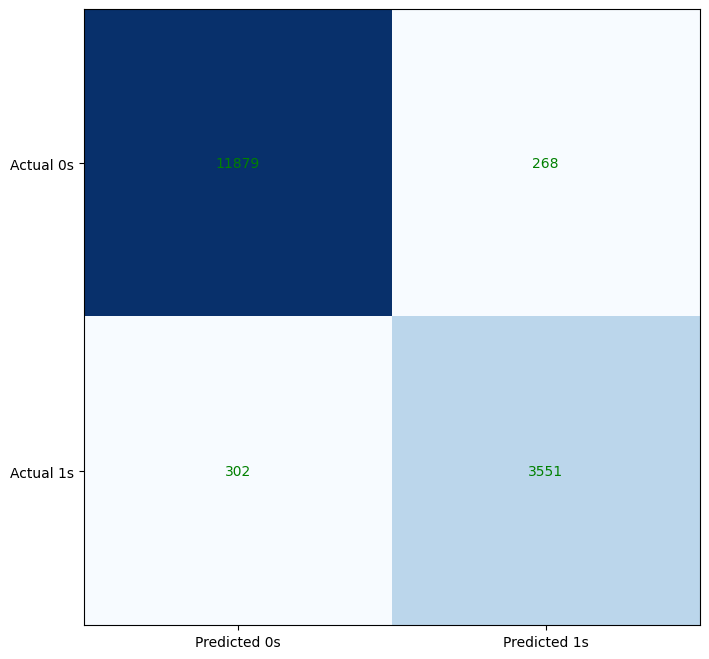

In [127]:
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(Y_TRAIN, y_pred)

# Create figure and axis for the plot with specific size
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')  # Use a colormap for better visuals

# Set ticks and labels for x-axis (predicted values)
ax.xaxis.set(ticks=range(2), ticklabels=('Predicted 0s', 'Predicted 1s'))

# Set ticks and labels for y-axis (actual values)
ax.yaxis.set(ticks=range(2), ticklabels=('Actual 0s', 'Actual 1s'))

# Set limits to match the matrix structure
ax.set_ylim(1.5, -0.5)

# Add values to each cell in the confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='green')

# Display the plot
plt.show()

## Perform Testing on Test Set

In [128]:
y_pred = df.predict(X_TEST)
print(y_pred)


[0 0 1 ... 0 0 0]


In [129]:
print(Y_TEST)

5228     0
12332    0
4692     1
2617     0
5633     0
        ..
17709    1
18039    0
17535    0
11445    0
19706    0
Name: LoanApproved, Length: 4000, dtype: int64


## Testing Accuracy

In [130]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TEST, y_pred)
print("The Accuracy of Prediction on S is ", accuracy)

The Accuracy of Prediction on S is  0.962


## Draw Confusion Matrix

In [131]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_TEST, y_pred)

array([[3006,   67],
       [  85,  842]], dtype=int64)

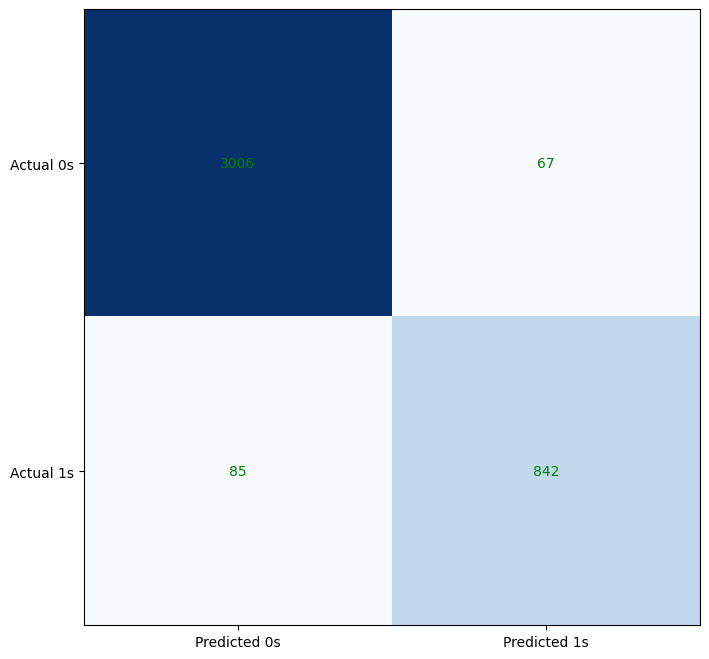

In [132]:
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(Y_TEST, y_pred)

# Create figure and axis for the plot with specific size
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')  # Use a colormap for better visuals

# Set ticks and labels for x-axis (predicted values)
ax.xaxis.set(ticks=range(2), ticklabels=('Predicted 0s', 'Predicted 1s'))

# Set ticks and labels for y-axis (actual values)
ax.yaxis.set(ticks=range(2), ticklabels=('Actual 0s', 'Actual 1s'))

# Set limits to match the matrix structure
ax.set_ylim(1.5, -0.5)

# Add values to each cell in the confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='green')

# Display the plot
plt.show()

## Generate Classification Report

In [133]:
from sklearn.metrics import classification_report
#Y_Test (actual labels) and y_pred (predicted labels)
report = classification_report(Y_TEST, y_pred,zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3073
           1       0.93      0.91      0.92       927

    accuracy                           0.96      4000
   macro avg       0.95      0.94      0.95      4000
weighted avg       0.96      0.96      0.96      4000



# Decision Tree

## Perform Training on Train Set

In [134]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
df = DecisionTreeClassifier(random_state = 80)

In [136]:
df.fit(X_TRAIN, Y_TRAIN) 
DecisionTreeClassifier(random_state=80)

DecisionTreeClassifier(random_state=80)

In [137]:
# Make predictions on the training data
y_pred = df.predict(X_TRAIN)
print(y_pred)

[0 0 0 ... 0 0 0]


In [138]:
print(Y_TRAIN)

4646     0
12970    0
18846    0
2327     0
5120     0
        ..
8714     0
2259     0
19366    0
5308     0
17583    0
Name: LoanApproved, Length: 16000, dtype: int64


## Training Accuracy

In [88]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_TRAIN,y_pred)
print('The Accuracy of prediction on S is',accuracy)

The Accuracy of prediction on S is 1.0


## Draw Confusion Matrix

In [89]:
from sklearn.metrics import classification_report, confusion_matrix
#Y_Train (actual labels) and y_pred (predicted labels)
confusion_matrix(Y_TRAIN,y_pred)

array([[12147,     0],
       [    0,  3853]], dtype=int64)

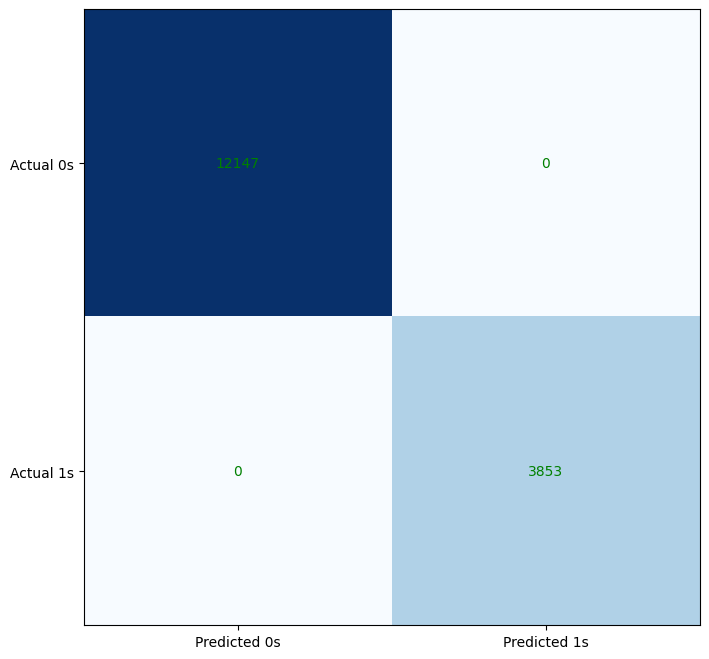

In [90]:
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(Y_TRAIN, y_pred)

# Create figure and axis for the plot with specific size
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')  # Use a colormap for better visuals

# Set ticks and labels for x-axis (predicted values)
ax.xaxis.set(ticks=range(2), ticklabels=('Predicted 0s', 'Predicted 1s'))

# Set ticks and labels for y-axis (actual values)
ax.yaxis.set(ticks=range(2), ticklabels=('Actual 0s', 'Actual 1s'))

# Set limits to match the matrix structure
ax.set_ylim(1.5, -0.5)

# Add values to each cell in the confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='green')

# Display the plot
plt.show()

## Perform Testing On test Set

In [91]:
y_pred = df.predict(X_TEST)
print(y_pred)

[0 0 1 ... 0 1 0]


In [92]:
print(Y_TEST)

5228     0
12332    0
4692     1
2617     0
5633     0
        ..
17709    1
18039    0
17535    0
11445    0
19706    0
Name: LoanApproved, Length: 4000, dtype: int64


## Testing Accuracy 

In [93]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TEST, y_pred)
print("The Accuracy of Prediction on S is ", accuracy)

The Accuracy of Prediction on S is  0.93175


## Draw Confusion Matrix

In [94]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_TEST, y_pred)

array([[2930,  143],
       [ 130,  797]], dtype=int64)

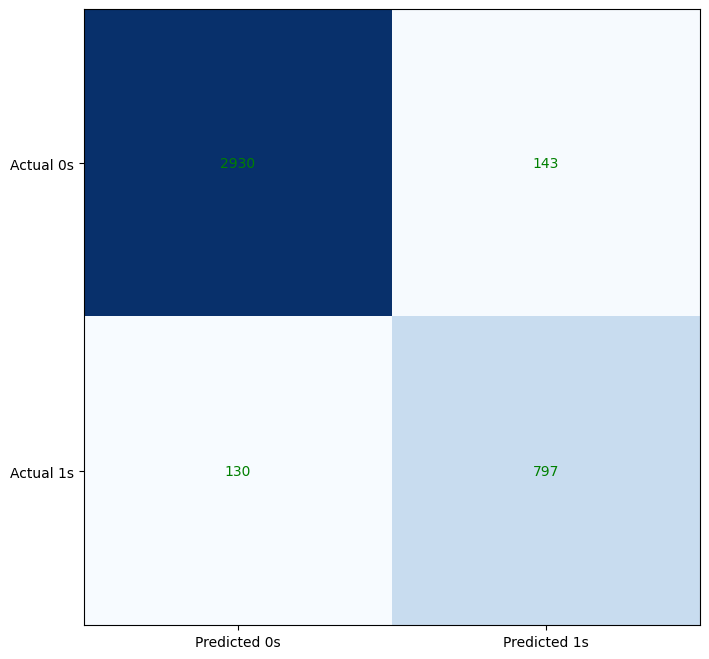

In [95]:
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(Y_TEST, y_pred)

# Create figure and axis for the plot with specific size
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')  # Use a colormap for better visuals

# Set ticks and labels for x-axis (predicted values)
ax.xaxis.set(ticks=range(2), ticklabels=('Predicted 0s', 'Predicted 1s'))

# Set ticks and labels for y-axis (actual values)
ax.yaxis.set(ticks=range(2), ticklabels=('Actual 0s', 'Actual 1s'))

# Set limits to match the matrix structure
ax.set_ylim(1.5, -0.5)

# Add values to each cell in the confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='green')

# Display the plot
plt.show()

## Generate Calssification Report

In [96]:
from sklearn.metrics import classification_report
#Y_Test (actual labels) and y_pred (predicted labels)
report = classification_report(Y_TEST, y_pred,zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3073
           1       0.85      0.86      0.85       927

    accuracy                           0.93      4000
   macro avg       0.90      0.91      0.90      4000
weighted avg       0.93      0.93      0.93      4000



# Random Forest

## Perform Training on Train Set

In [97]:
from sklearn.ensemble import RandomForestClassifier
df = RandomForestClassifier(n_estimators=5, random_state=80)
 
df.fit(X_TRAIN, Y_TRAIN) 
RandomForestClassifier(n_estimators=5, random_state=80)

RandomForestClassifier(n_estimators=5, random_state=80)

In [98]:
y_pred = df.predict(X_TRAIN)
print(y_pred)

[0 0 0 ... 0 0 0]


In [99]:
print(Y_TRAIN)

4646     0
12970    0
18846    0
2327     0
5120     0
        ..
8714     0
2259     0
19366    0
5308     0
17583    0
Name: LoanApproved, Length: 16000, dtype: int64


## Training Accuracy

In [100]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_TRAIN,y_pred)
print('The accuracy of prediction on S is',accuracy)

The accuracy of prediction on S is 0.993125


## Draw Confusion Matrix

In [101]:
from sklearn.metrics import classification_report, confusion_matrix
#Y_Train (actual labels) and y_pred (predicted labels)
confusion_matrix(Y_TRAIN,y_pred)

array([[12111,    36],
       [   74,  3779]], dtype=int64)

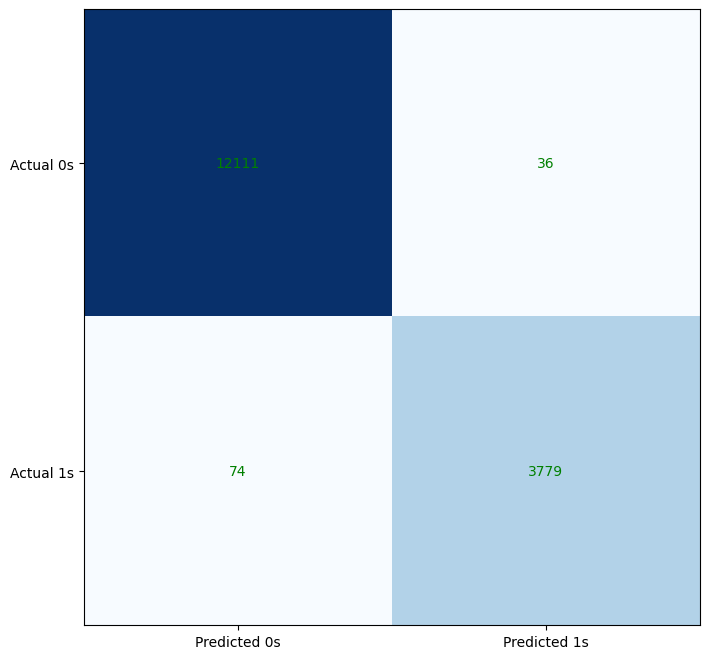

In [102]:
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(Y_TRAIN, y_pred)

# Create figure and axis for the plot with specific size
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')  # Use a colormap for better visuals

# Set ticks and labels for x-axis (predicted values)
ax.xaxis.set(ticks=range(2), ticklabels=('Predicted 0s', 'Predicted 1s'))

# Set ticks and labels for y-axis (actual values)
ax.yaxis.set(ticks=range(2), ticklabels=('Actual 0s', 'Actual 1s'))

# Set limits to match the matrix structure
ax.set_ylim(1.5, -0.5)

# Add values to each cell in the confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='green')

# Display the plot
plt.show()

## Perform Testing On test set

In [103]:
y_pred = df.predict(X_TEST)
print(y_pred)

[0 0 1 ... 0 0 0]


In [104]:
print(Y_TEST)

5228     0
12332    0
4692     1
2617     0
5633     0
        ..
17709    1
18039    0
17535    0
11445    0
19706    0
Name: LoanApproved, Length: 4000, dtype: int64


## Testing Accuracy

In [105]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TEST, y_pred)
print("The Accuracy of Prediction on S is ", accuracy)

The Accuracy of Prediction on S is  0.93925


## Draw Confusion Matrix

In [106]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_TEST, y_pred)

array([[2990,   83],
       [ 160,  767]], dtype=int64)

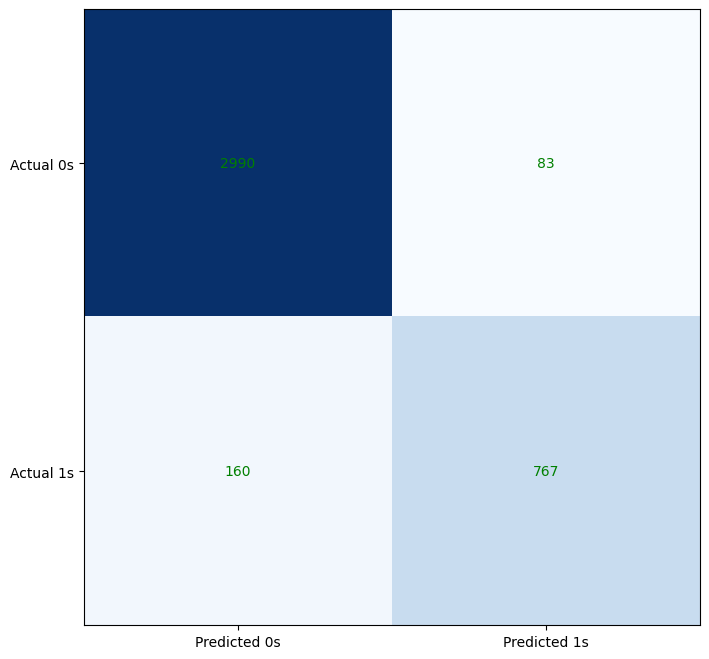

In [107]:
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(Y_TEST, y_pred)

# Create figure and axis for the plot with specific size
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')  # Use a colormap for better visuals

# Set ticks and labels for x-axis (predicted values)
ax.xaxis.set(ticks=range(2), ticklabels=('Predicted 0s', 'Predicted 1s'))

# Set ticks and labels for y-axis (actual values)
ax.yaxis.set(ticks=range(2), ticklabels=('Actual 0s', 'Actual 1s'))

# Set limits to match the matrix structure
ax.set_ylim(1.5, -0.5)

# Add values to each cell in the confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='green')

# Display the plot
plt.show()

## Generate Classification Report

In [108]:
from sklearn.metrics import classification_report
#Y_Test (actual labels) and y_pred (predicted labels)
report = classification_report(Y_TEST, y_pred,zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3073
           1       0.90      0.83      0.86       927

    accuracy                           0.94      4000
   macro avg       0.93      0.90      0.91      4000
weighted avg       0.94      0.94      0.94      4000



# Conclusion

## Underfitting: Gaussian Naive Bayes.
## Overfitting: Decision Tree and random forest.
## NEURAL NETWORK gives highest accuracy but over all other models of Classification 
## Best Model: Logistic Regression and SVM are the best-performing models due to their high and balanced accuracy,making them more reliable than the others.
## If computational cost is a concern, Logistic Regression may be preferred over SVM for simplicity.